### TP1

In [1]:
from tp_perceptron_source import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
from matplotlib import rc

#### Question 1

In [2]:
n = 10
mu = [1., 1.]
sigmas = [1., 1.]
rand_gauss(n, mu, sigmas)

array([[ 1.15419947e+00,  2.76110977e-02],
       [ 2.58588708e+00,  5.65533020e-01],
       [ 5.05331475e-01,  5.72758767e-02],
       [ 6.52534662e-01,  3.54689607e-01],
       [ 2.40608487e+00,  1.00614816e+00],
       [-2.09456207e+00,  3.06215736e-01],
       [ 8.17487330e-01,  2.11890348e+00],
       [-6.50255617e-01,  1.48230804e+00],
       [ 1.56763813e+00, -1.50765311e-03],
       [-8.59818027e-01,  1.84951991e+00]])

In [3]:
n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)


In [4]:
n1 = 50
n2 = 50
sigmas1 = 1.
sigmas2 = 2.
X2, y2 = rand_clown(n1, n2, sigmas1, sigmas2)


In [5]:
n1 = 75
n2 = 75
sigma = 0.1
X3, y3 = rand_checkers(n1, n2, sigma)


#### Question 2

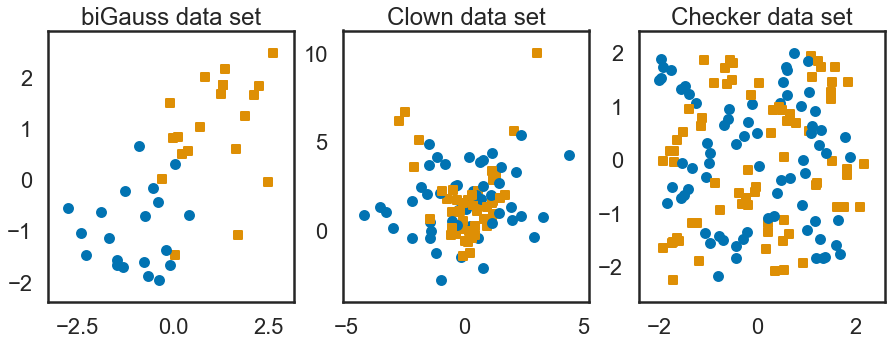

In [6]:
plt.close("all")
plt.figure(1, figsize=(15, 5))
plt.subplot(131)
plt.title('biGauss data set')
plot_2d(X1, y1)
plt.subplot(132)
plt.title('Clown data set')
plot_2d(X2, y2)
plt.subplot(133)
plt.title('Checker data set')
plot_2d(X3, y3)
plt.show()

#### Perceptron

#### Question 1

Lorsque p = 2, on obtient un hyperplan de dimension 2 (donc un plan)

A la main, pour le premier, on peut trouver w0 = 2, w1 = -1.5

Pour le deuxième et troisième data set, il n'y a pas vriament de bon classifieur

f grand => loin de la droite de classif
f négatif => en dessous de la courbe
f positif => au dessus de la courbe
Cette fonction permet de prédire la valeur de sorti de X

w0 est l'ordonnée à l'origine

#### Question 2

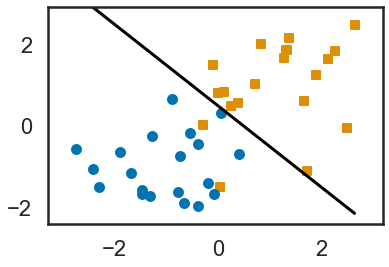

In [22]:
w = [0.5, -1, -1]
plot_2d(X1, y1, w)

In [24]:
predict(X1, w)

array([-0.45486753,  3.02477769,  2.83156367, -2.66671424, -1.93967014,
        3.52145372, -0.30553829,  0.77510901,  1.94552878,  1.92646125,
       -2.67901716, -1.75245747,  0.76355264,  3.79578668,  0.13897339,
       -2.62583621, -3.25809521, -0.23955276,  1.32300943, -3.02463426,
        4.26031451,  2.87142059, -1.2527264 ,  2.07056916,  1.18863611,
       -4.60251591, -0.91950821,  3.9444159 ,  3.51008902, -0.12217975,
        3.03389458,  1.99769205,  0.72738436, -3.58924361,  3.31255031,
       -2.33757673,  3.61597784, -2.43255346,  2.24299501, -0.45431207])

#### Question 3

$\hat{f}$ est grand lorsque le point est loin de l'hyperplan de séparation linéaire. $\hat{f}$ est négatif lorsque la donnée est en dessous de l'hyperplan, $\hat{f}$ est positif lorsque la donnée est au dessus de l'hyperplan. $\hat{f}$ est donc le vecteur de classification et $\omega_0$ est l'intercept.

#### Question 4

#### Question 4

In [67]:
epsilon = 0.001
niter = 1000
w_ini = np.random.randn(X1.shape[1] + 1)
lfun = mse_loss
gr_lfun = gr_mse_loss

In [70]:
w_final, loss = gradient(X1, y1, epsilon, niter, w_ini, lfun, gr_lfun, stochastic=False)

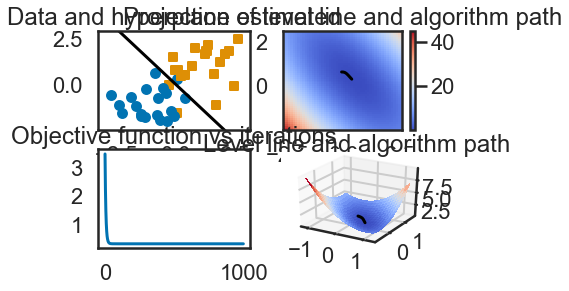

In [71]:
plot_gradient(X1, y1, w_final, loss, lfun)

#### Question 8

In [ ]:
fig, ax = plt.subplots(3, 3,figsize=(15,15))

size_data = 40
w_ini = np.random.randn(3)
lfun = mse_loss
gr_lfun = gr_mse_loss
epsilon = 0.001
niter = 1000

for i in range(3):
    delta = 100**(-i)
   
    for j in range(3):
        M = 6**j
       
        x_test = np.zeros((size_data,2))
        x_test[20:,0] = delta
        x_test[:,1] =  np.random.uniform(0,M,size=40)

        y = np.ones(size_data)
        y[20:] = -1

        _, loss = gradient(x_test, y, epsilon, niter, w_ini, lfun,
                     gr_lfun, stochastic=True)
        ax[i,j].plot(np.arange(loss.shape[0]),loss)
        ax[i,j].set_xlim(-1,len(loss))
        ax[i,j].set_ylim(np.min(loss),np.max(loss[100:]))
        ax[i,j].set_title(f'M={M},delta={delta},{loss[niter-1]:.2f}')